In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import json
import re
import seaborn as sns
import folium

# Importing data

In [430]:
file_path = './data/dice_jobs_list.csv'

In [431]:
dice = pd.read_csv(file_path)

In [432]:
dice.head()

,salary,crawled_at,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,raw_description,skills,latitude,_id,company,posted_at,source
0,Depends on Experience,"04/16/2021, 19:51:28","Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC","<div class=""highlight-black"" id=""jobdescSec"">\...",Azure AD,35.227085,6ea0725a-554f-5db9-8fa3-81b8eea3d9c6,"Nutech Systems, Inc.",2021-04-13T22:31:54Z,https://www.dice.com
1,Depends on Experience,"04/16/2021, 19:51:31",We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,NaN,IT Software,Contract W2,0.000000,USD,IT Diploma/Degree/Certification,NaN,NaN,"<div class=""highlight-black"" id=""jobdescSec"">\...","Account management, Advertising, Content marke...",0.000000,68afe519-ecca-5fe8-a553-2b4511d367e2,"Software Resources, Inc.",2021-04-12T16:31:29Z,https://www.dice.com
2,Depends on Experience,"04/16/2021, 19:51:34",Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","<div class=""highlight-black"" id=""jobdescSec"">\...","Campaign management, Media buying, Analytics, ...",37.630490,9221c243-e03a-5c7c-96f6-37d8edcd39a6,"Tranzeal, Inc.",2021-04-14T20:15:06Z,https://www.dice.com
3,Market,"04/16/2021, 19:51:37",Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","<div class=""highlight-black"" id=""jobdescSec"">\...","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,493b1cc2-3c1e-5cd4-bd3e-d4a6403b2501,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z,https://www.dice.com
4,Market,"04/16/2021, 19:51:39",Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","<div class=""highlight-black"" id=""jobdescSec"">\...","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,34d5e29c-0645-5567-b4c1-2820abcc316f,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z,https://www.dice.com


In [433]:
dice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   salary                  9813 non-null   object 
 1   crawled_at              9814 non-null   object 
 2   description             9814 non-null   object 
 3   title                   9814 non-null   object 
 4   url                     9814 non-null   object 
 5   country                 8613 non-null   object 
 6   industry                9814 non-null   object 
 7   job_type                9814 non-null   object 
 8   longitude               9814 non-null   float64
 9   currency                9814 non-null   object 
 10  education_requirements  9814 non-null   object 
 11  postal_code             8232 non-null   object 
 12  location                8602 non-null   object 
 13  raw_description         9814 non-null   object 
 14  skills                  9569 non-null   

# Cleaning the dataset

In [434]:
df = dice.drop(['crawled_at', 'raw_description', '_id', 'source'], axis=1)
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13T22:31:54Z
1,Depends on Experience,We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,NaN,IT Software,Contract W2,0.000000,USD,IT Diploma/Degree/Certification,NaN,NaN,"Account management, Advertising, Content marke...",0.000000,"Software Resources, Inc.",2021-04-12T16:31:29Z
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14T20:15:06Z
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z


In [435]:
data_types = {'salary': 'string', 'description': 'string', 'title': 'string', 'url': 'string',
             'country': 'string', 'industry': 'string', 'job_type': 'string', 'longitude': 'float64', 'currency': 'string',
             'education_requirements': 'string', 'postal_code': 'string', 'location': 'string', 'skills': 'string', 
             'latitude': 'float64', 'company': 'string', 'posted_at': 'datetime64'}
df = df.astype(data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  9813 non-null   string        
 1   description             9814 non-null   string        
 2   title                   9814 non-null   string        
 3   url                     9814 non-null   string        
 4   country                 8613 non-null   string        
 5   industry                9814 non-null   string        
 6   job_type                9814 non-null   string        
 7   longitude               9814 non-null   float64       
 8   currency                9814 non-null   string        
 9   education_requirements  9814 non-null   string        
 10  postal_code             8232 non-null   string        
 11  location                8602 non-null   string        
 12  skills                  9569 non-null   string  

In [436]:
df.loc[df.skills.isna(), 'skills']

87      <NA>
91      <NA>
261     <NA>
262     <NA>
263     <NA>
        ... 
9491    <NA>
9532    <NA>
9545    <NA>
9622    <NA>
9786    <NA>
Name: skills, Length: 245, dtype: string

In [437]:
df['skills'].replace(np.nan, '', inplace=True)
df.loc[df.skills.isna(), 'skills']

Series([], Name: skills, dtype: string)

In [438]:
df.replace('', np.nan, inplace=True)

In [439]:
df.loc[df.isna().any(axis=1), :]

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
1,Depends on Experience,We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Account management, Advertising, Content marke...",0.000000,"Software Resources, Inc.",2021-04-12 16:31:29
7,No Salary Listed,Flexion is currently seeking a REMOTE AAD/AD A...,REMOTE AAD/AD Active Directory Consultant (3669),https://www.dice.com/jobs/detail/REMOTE-AAD%26...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Active Directory, Azure Active Directory",0.000000,Flexion Inc,2021-04-06 12:30:55
13,$65 - $70,JOB Description :Solution Architect- Microsoft...,Solution Architect,https://www.dice.com/jobs/detail/Solution-Arch...,US,IT Software,Contract W2,-104.99025,USD,IT Diploma/Degree/Certification,<NA>,"Denver, Colorado","Microsoft AD, ForgeRock, IIQ, .Net stack",39.739235,Igen Systems,2021-04-07 14:46:16
17,"$100,000 - $130,000",Remote position - work from home - as some of ...,Identity Security Consultant,https://www.dice.com/jobs/detail/Identity-Secu...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Identity Access Management, Privilege Access M...",0.000000,XMS Solutions Inc,2021-03-30 20:45:21
22,"$60,000 - $120,000",BlueSage Solutions is hiring. Cutting edge tec...,Java Software Developer,https://www.dice.com/jobs/detail/Java-Software...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Java, Azure, MySQL, GitHub, Groovy, Sencha, Ex...",0.000000,Blue Sage Solutions,2021-04-09 19:30:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,Depends on Experience,"Minimum Requirements:3+ years, SharePoint, One...",SharePoint Engineer,https://www.dice.com/jobs/detail/SharePoint-En...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"SharePoint, O365, Active Directory, Azure AD",0.000000,Indotronix International Corp,2021-03-23 18:18:12
9806,"$60,000 - $120,000",BlueSage Solutions is hiring. Cutting edge tec...,Java Software Developer,https://www.dice.com/jobs/detail/Java-Software...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Java, Azure, MySQL, GitHub, Groovy, Sencha, Ex...",0.000000,Blue Sage Solutions,2021-04-09 19:30:02
9809,Depends on Experience,LumenVox has an exciting opportunity for a Sof...,Software Developer - Remote,https://www.dice.com/jobs/detail/Software-Deve...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"natural language processing, voice biometrics,...",0.000000,LumenVox,2021-04-14 14:15:40
9810,"$80,000 - $110,000",WANTED: Full-Stack Node JS/React (Node.js) (10...,Full-Stack Node JS/React Developer - 100% Remote,https://www.dice.com/jobs/detail/Full%26%2345S...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Engineering, HTML, JavaScript, MongoDB, Node.j...",0.000000,Giftnix,2021-04-06 18:30:02


# Only keeping US data

In [440]:
df['country'].value_counts()

US    8438
CA      78
IN      51
us      15
UN       6
DK       6
BR       5
ca       3
BG       3
GB       3
IE       2
U.       1
LT       1
NL       1
Name: country, dtype: Int64

In [441]:
df.loc[df['country']=='us','location']

568       Minneapolis, MN
1942         Dearborn, MI
2096       Cincinnati, OH
2291    Sandy Springs, GA
4592       Cincinnati, OH
4642       Cincinnati, OH
4644       Cincinnati, OH
4648       Cincinnati, OH
4649       Cincinnati, OH
5371             Lehi, UT
5979         Dearborn, MI
5980         Dearborn, MI
8036      Santa Clara, CA
8105      Santa Clara, CA
8301          Ashburn, VA
Name: location, dtype: string

In [442]:
df['country'] = df['country'].replace({'us': 'US'})

In [443]:
df['country'].value_counts()

US    8453
CA      78
IN      51
UN       6
DK       6
BR       5
ca       3
BG       3
GB       3
IE       2
U.       1
LT       1
NL       1
Name: country, dtype: Int64

In [444]:
df = df.loc[(df['country']=='US'), :]
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14 20:15:06
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01 01:05:06
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10 01:05:17
5,Depends on Experience,"Mandatory:· Sr level experience, Netwo...",AD/DNS Engineer,https://www.dice.com/jobs/detail/AD%26%2347DNS...,US,IT Software,"Contract W2, Contract Independent",-117.900290,USD,IT Diploma/Degree/Certification,92821,"Brea, CA","Active Directory, DNS, Networking, Routing, Su...",33.916473,The Proven Method,2021-04-08 19:45:59


In [445]:
df['country'].value_counts()

US    8453
Name: country, dtype: Int64

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8453 entries, 0 to 9812
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  8452 non-null   string        
 1   description             8453 non-null   string        
 2   title                   8453 non-null   string        
 3   url                     8453 non-null   string        
 4   country                 8453 non-null   string        
 5   industry                8453 non-null   string        
 6   job_type                8453 non-null   string        
 7   longitude               8453 non-null   float64       
 8   currency                8453 non-null   string        
 9   education_requirements  8453 non-null   string        
 10  postal_code             8085 non-null   string        
 11  location                8390 non-null   string        
 12  skills                  8212 non-null   string  

In [447]:
df.loc[df.isna().any(axis=1), :]

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
13,$65 - $70,JOB Description :Solution Architect- Microsoft...,Solution Architect,https://www.dice.com/jobs/detail/Solution-Arch...,US,IT Software,Contract W2,-104.99025,USD,IT Diploma/Degree/Certification,<NA>,"Denver, Colorado","Microsoft AD, ForgeRock, IIQ, .Net stack",39.739235,Igen Systems,2021-04-07 14:46:16
87,-,"About CitiCiti, the leading global bank, has a...",Domain Administration Analyst,https://www.dice.com/jobs/detail/Domain-Admini...,US,IT Software,Full Time,-96.94343,USD,IT Diploma/Degree/Certification,75039,"Irving, TX",<NA>,32.888687,Citi,2021-03-23 12:15:59
91,Competitive,RESPONSIBILITIES:Kforce has a client in search...,"Team Lead, Ad Ops and Analytics",https://www.dice.com/jobs/detail/Team-Lead%2C-...,US,IT Software,Full Time,-80.09216,USD,IT Diploma/Degree/Certification,33432,"Boca Raton, FL",<NA>,26.349491,Kforce Technology Staffing,2021-04-14 14:07:29
144,Depends on Experience,Primary Job Tasks & Responsibilities:Administr...,System Administrator - Active Directory,https://www.dice.com/jobs/detail/System-Admini...,US,IT Software,Full Time,-72.79503,USD,IT Diploma/Degree/Certification,<NA>,"Farmington, Connecticut","AD, Active directory, System Administartor",41.736030,Microland Limited,2021-03-06 22:08:04
159,No Salary Listed,** and those authorized to work in the U.S. ca...,Developer - Ad Staging,https://www.dice.com/jobs/detail/Developer-%26...,US,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,Work At Home 99999,"Developer, API, Web, Manager, Python",0.000000,Rose International,2021-04-09 00:18:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,"$60,000 - $80,000",We are seeking a Web Developer to join our tea...,Software Developer,https://www.dice.com/jobs/detail/Software-Deve...,US,IT Software,Full Time,-81.31243,USD,IT Diploma/Degree/Certification,<NA>,"St. Augustine, FL","javascript, php, css, html, mysql",29.901243,AeroBase Group,2021-04-05 14:45:04
9755,Depends on Experience,"Alert Five, Inc. is seeking to fill a Data Sci...",Data Scientist,https://www.dice.com/jobs/detail/Data-Scientis...,US,IT Software,Full Time,-77.03687,USD,IT Diploma/Degree/Certification,<NA>,"Washington D.c., DC","Computer-aided software engineering, Ad hoc re...",38.907192,iQuasar LLC,2021-03-04 12:05:09
9769,Depends on Experience,"GIS Software Developer, St. Louis, MO Qualifie...",GIS Software Developer - M,https://www.dice.com/jobs/detail/GIS-Software-...,US,IT Software,Full Time,-90.19940,USD,IT Diploma/Degree/Certification,<NA>,"St. Louis, MO","GIS Software Developer, Python 3, JavaScript, ...",38.627003,Next Step Systems,2021-04-15 10:45:08
9770,Depends on Experience,"Lead GIS Software Developer, St. Louis, MO Qu...",Lead GIS Software Developer - G,https://www.dice.com/jobs/detail/Lead-GIS-Soft...,US,IT Software,Full Time,-90.19940,USD,IT Diploma/Degree/Certification,<NA>,"St. Louis, MO","Lead GIS Software Developer, Python 3, JavaScr...",38.627003,Next Step Systems,2021-04-15 10:45:08


# Extraction state and adding region column

In [448]:
df['location'].value_counts()

New York, NY         275
Atlanta, GA          243
San Francisco, CA    206
Chicago, IL          187
Austin, TX           177
                    ... 
Hillsdale, MI          1
Sharon, PA             1
Warrenville, IL        1
Ames, IA               1
Harrison, NY           1
Name: location, Length: 1111, dtype: Int64

In [449]:
us_states_file_path = './data/states.csv'
us_states = pd.read_csv(us_states_file_path, dtype={'State': 'category', 'State Code': 'category', 
                                                     'Region': 'category', 'Division': 'category'})
us_states.rename(columns=lambda x: x.lower(), inplace=True)
us_states.head()

,state,state code,region,division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [450]:
us_states['state code'].unique().size

51

In [451]:
us_states['region'].unique()

['West', 'South', 'Northeast', 'Midwest']
Categories (4, object): ['Midwest', 'Northeast', 'South', 'West']

In [452]:
df['state'] = df['location'].str.strip().str[-2:]

# Filter the dataset to include only job postings with a valid US state code
df = df[df['state'].isin(us_states['state code'])]

# Now data['states'].unique() should only contain valid US state codes
df['state'].unique()

df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at,state
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14 20:15:06,CA
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01 01:05:06,WA
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10 01:05:17,FL
5,Depends on Experience,"Mandatory:· Sr level experience, Netwo...",AD/DNS Engineer,https://www.dice.com/jobs/detail/AD%26%2347DNS...,US,IT Software,"Contract W2, Contract Independent",-117.900290,USD,IT Diploma/Degree/Certification,92821,"Brea, CA","Active Directory, DNS, Networking, Routing, Su...",33.916473,The Proven Method,2021-04-08 19:45:59,CA


In [453]:
df = df.merge(us_states, left_on='state', right_on='state code', validate='m:1', suffixes=['_d', '_s'])
df.drop(['state code', 'state_s'], axis=1, inplace=True)
col_name = list(df.columns)
col_name[col_name.index('state_d')] = 'state'
df.columns = col_name

In [454]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at,state,region,division
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,South,South Atlantic
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",".net, oauth, valet key, api, azure AD",35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,South,South Atlantic
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,27601,"Raleigh, NC","AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,South,South Atlantic
3,No Salary Listed,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,28204,"Charlotte, NC","Azure, Active Directory",35.214584,Apar Technologies,2021-04-14 13:30:37,NC,South,South Atlantic
4,No Salary Listed,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,27704,"Durham, NC","SSO, SAML, Azure AD, OAuth, OpenID",36.034160,Droisys,2020-03-06 22:05:41,NC,South,South Atlantic


In [455]:
df = df.astype({'state': 'category', 'currency': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 8240
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  8240 non-null   string        
 1   description             8241 non-null   string        
 2   title                   8241 non-null   string        
 3   url                     8241 non-null   string        
 4   country                 8241 non-null   string        
 5   industry                8241 non-null   string        
 6   job_type                8241 non-null   string        
 7   longitude               8241 non-null   float64       
 8   currency                8241 non-null   category      
 9   education_requirements  8241 non-null   string        
 10  postal_code             8036 non-null   string        
 11  location                8241 non-null   string        
 12  skills                  8013 non-null   string  

In [456]:
df.currency.unique()

['USD']
Categories (1, string): [USD]

In [457]:
df[['longitude', 'latitude', 'location']].isna().any().sum()

0

# Cleaning salary column

In [458]:
df['salary'] = df.salary.apply(lambda x: x.lower() if pd.notna(x) else np.nan)

In [459]:
df['salary'].replace('no salary listed', np.nan, inplace=True)

In [460]:
df = df.astype({'salary': 'string'})

In [461]:
# for x in df.salary:
#     print(x)

In [462]:
df.loc[df.salary.isna(), 'salary']

3       <NA>
4       <NA>
6       <NA>
8       <NA>
10      <NA>
        ... 
8235    <NA>
8236    <NA>
8237    <NA>
8239    <NA>
8240    <NA>
Name: salary, Length: 4089, dtype: string

In [463]:
def detect_number(x):
    pattern = re.compile('^.*\d.*$')
    if re.match(pattern, x) is None:
        return False
    return True

In [464]:
detect_number('45')

True

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 8240
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  4152 non-null   string        
 1   description             8241 non-null   string        
 2   title                   8241 non-null   string        
 3   url                     8241 non-null   string        
 4   country                 8241 non-null   string        
 5   industry                8241 non-null   string        
 6   job_type                8241 non-null   string        
 7   longitude               8241 non-null   float64       
 8   currency                8241 non-null   category      
 9   education_requirements  8241 non-null   string        
 10  postal_code             8036 non-null   string        
 11  location                8241 non-null   string        
 12  skills                  8013 non-null   string  

In [466]:
salary_with_numbers = df['salary'].apply(lambda x: True if (pd.notna(x) and detect_number(x)) else False)
salary_with_numbers

0       False
1        True
2        True
3       False
4       False
        ...  
8236    False
8237    False
8238     True
8239    False
8240    False
Name: salary, Length: 8241, dtype: bool

In [467]:
df.loc[~salary_with_numbers, 'salary'].unique()

<StringArray>
[               'depends on experience',
                                   <NA>,
                          'competitive',
                               'market',
                                    '$',
                  'based on experience',
                       'market related',
              '$ depends on experience',
                              '$market',
                       '$as per market',
                           'negotiable',
                          '$negotiable',
                                    '-',
                                '$best',
                                 '$doe',
                                '$open',
 'contract to hire with great benefits',
                                 '-usd',
                  '$as per market rate',
                                 '$tbd',
           'commensurate on experience',
              'depending on experience',
                      'depends on exp.',
                        '$$$negotiable',
  

In [468]:
def find_salary(salary_string):
    salary_string = salary_string.replace(',', '')
    pattern = re.compile('[\d(\.\d)?]+')
    salaries = re.findall(pattern, salary_string)
    for idx in range(len(salaries)):
        check_idx = salary_string.index(salaries[idx]) + len(salaries[idx])
        if check_idx==len(salary_string) or not(salary_string[check_idx] in ['k', 'm']):
            salaries[idx] = float(salaries[idx])
        elif salary_string[check_idx]=='k':
            salaries[idx] = float(salaries[idx])*1000
        elif salary_string[check_idx]=='m':
            salaries[idx] = float(salaries[idx])*math.pow(10,6)
   
    return salaries

In [469]:
find_salary('100,00,00,.453k')

[1000000453.0]

In [470]:
def determine_payment_frequency(salary_string, salaries):
    frequency = None
    hourly = ['hr', 'hourly', 'hour']
    monthly = ['monthly', 'mo', 'month']
    yearly = ['yearly', 'annual', 'annum', 'year', 'yr']
    weekly = ['week', 'weekly']
    for i in hourly:
        if i in salary_string:
            return 'hourly'
    for i in yearly:
        if i in salary_string:
            return 'yearly'
    for i in monthly:
        if i in salary_string:
            return 'monthly'
    for i in weekly:
        if i in salary_string:
            return 'weekly'
    if max(salaries)<=500:
        return 'hourly'
    elif min(salaries)>=35000:
        return 'yearly'
    else:
        return 'monthly'

In [471]:
def det_salary_range_and_frequency(salary_string):
    salaries = find_salary(salary_string)
    if len(salaries)==1:
        salaries.append(salaries[0])
    frequency = determine_payment_frequency(salary_string, salaries)
    salaries.append(frequency)
    d = {'min_salary': salaries[0], 'max_salary': salaries[1], 'frequency': salaries[2]}
    return d

In [472]:
salaries_and_frequency = df.loc[salary_with_numbers, 'salary'].apply(lambda x: det_salary_range_and_frequency(x))

In [473]:
sal_df = pd.DataFrame(salaries_and_frequency.to_dict()).transpose()
sal_df

,min_salary,max_salary,frequency
1,55.0,60.0,hourly
2,80000.0,120000.0,yearly
7,55.0,60.0,hourly
14,100000.0,130000.0,yearly
15,250000.0,250000.0,yearly
...,...,...,...
8224,50.0,50.0,hourly
8225,60000.0,70000.0,yearly
8226,65000.0,75000.0,yearly
8227,65000.0,75000.0,yearly


In [474]:
df.loc[salary_with_numbers, ['min_salary', 'max_salary', 'frequency']] = sal_df

In [475]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,skills,latitude,company,posted_at,state,region,division,min_salary,max_salary,frequency
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,South,South Atlantic,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,".net, oauth, valet key, api, azure AD",35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,South,South Atlantic,55.0,60.0,hourly
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,"AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,South,South Atlantic,80000.0,120000.0,yearly
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,"Azure, Active Directory",35.214584,Apar Technologies,2021-04-14 13:30:37,NC,South,South Atlantic,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,"SSO, SAML, Azure AD, OAuth, OpenID",36.034160,Droisys,2020-03-06 22:05:41,NC,South,South Atlantic,NaN,NaN,NaN


In [476]:
df.loc[df[['min_salary', 'max_salary', 'frequency']].notna().any(axis=1), ['min_salary', 'max_salary', 'frequency']]

,min_salary,max_salary,frequency
1,55.0,60.0,hourly
2,80000.0,120000.0,yearly
7,55.0,60.0,hourly
14,100000.0,130000.0,yearly
15,250000.0,250000.0,yearly
...,...,...,...
8224,50.0,50.0,hourly
8225,60000.0,70000.0,yearly
8226,65000.0,75000.0,yearly
8227,65000.0,75000.0,yearly


In [477]:
df = df.astype({'min_salary': 'float64', 'max_salary': 'float64', 'frequency': 'category'})

In [478]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,skills,latitude,company,posted_at,state,region,division,min_salary,max_salary,frequency
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,South,South Atlantic,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,".net, oauth, valet key, api, azure AD",35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,South,South Atlantic,55.0,60.0,hourly
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,"AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,South,South Atlantic,80000.0,120000.0,yearly
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,"Azure, Active Directory",35.214584,Apar Technologies,2021-04-14 13:30:37,NC,South,South Atlantic,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,"SSO, SAML, Azure AD, OAuth, OpenID",36.034160,Droisys,2020-03-06 22:05:41,NC,South,South Atlantic,NaN,NaN,NaN


In [479]:
def calculate_annual_compensation(row, bound):
    if row['frequency']=='hourly':
        return row[bound+'_salary']*40*4*12
    elif row['frequency']=='monthly':
        return row[bound+'_salary']*12
    return row[bound+'_salary']

def calc_min_comp(row):
    return calculate_annual_compensation(row, 'min')

def calc_max_comp(row):
    return calculate_annual_compensation(row, 'max')

In [480]:
df['min_annual_comp'] = df.apply(lambda row: calc_min_comp(row), axis=1)
df['max_annual_comp'] = df.apply(lambda row: calc_max_comp(row), axis=1)
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,company,posted_at,state,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,South,South Atlantic,55.0,60.0,hourly,105600.0,115200.0
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,"Concurrents, Inc",2021-04-09 15:17:11,NC,South,South Atlantic,80000.0,120000.0,yearly,80000.0,120000.0
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,Apar Technologies,2021-04-14 13:30:37,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,Droisys,2020-03-06 22:05:41,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN


In [481]:
df['mean_salary'] = (df['min_annual_comp'] + df['max_annual_comp']) / 2

In [482]:
df_mt = df.loc[df.state=='MT', :]
df_mt

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,posted_at,state,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp,mean_salary
3980,"$82,000 - $108,000","Headquarters: Bozeman, MontanaStart Date: Imme...",Senior .Net Cloud Developer,https://www.dice.com/jobs/detail/Senior-.Net-C...,US,IT Software,Full Time,-111.04293,USD,IT Diploma/Degree/Certification,...,2021-04-08 15:30:30,MT,West,Mountain,82000.0,108000.0,yearly,82000.0,108000.0,95000.0
3981,$115k - 140k per year,"job summary:What You'll Need:BS CS/EE/CE, or e...",Software Engineer,https://www.dice.com/jobs/detail/Software-Engi...,US,IT Software,Full Time,-111.06422,USD,IT Diploma/Degree/Certification,...,2021-04-09 15:47:00,MT,West,Mountain,115000.0,140000.0,yearly,115000.0,140000.0,127500.0
3982,<NA>,Job Description Skills details Required ...,Google Cloud Platform Developer,https://www.dice.com/jobs/detail/Google-Cloud-...,US,IT Software,"Contract Corp-To-Corp, C2H Corp-To-Corp",0.00000,USD,IT Diploma/Degree/Certification,...,2020-06-22 20:30:53,MT,West,Mountain,NaN,NaN,NaN,NaN,NaN,NaN
3983,"$82,000 - $108,000","Headquarters: Bozeman, MontanaStart Date: Imme...",Senior .Net Cloud Developer,https://www.dice.com/jobs/detail/Senior-.Net-C...,US,IT Software,Full Time,-111.04293,USD,IT Diploma/Degree/Certification,...,2021-04-08 15:30:30,MT,West,Mountain,82000.0,108000.0,yearly,82000.0,108000.0,95000.0


In [483]:
sal_num_mt = df_mt['salary'].apply(lambda x: True if (pd.notna(x) and detect_number(x)) else False)
sal_num_mt

3980     True
3981     True
3982    False
3983     True
Name: salary, dtype: bool

In [484]:
salaries_and_frequency = df_mt.loc[salary_with_numbers, 'salary'].apply(lambda x: det_salary_range_and_frequency(x))
salaries_and_frequency

3980    {'min_salary': 82000.0, 'max_salary': 108000.0...
3981    {'min_salary': 115000.0, 'max_salary': 140000....
3983    {'min_salary': 82000.0, 'max_salary': 108000.0...
Name: salary, dtype: object

In [490]:
df.job_type.unique()

<StringArray>
[                                                                                        'Contract W2, Contract Independent',
                                                                  'Contract W2, Contract Independent, Contract Corp-To-Corp',
                                                                                                                 'Full Time',
                                                                                        'Contract Corp-To-Corp, Contract W2',
                                                                                                               'Contract W2',
                                                                                                     'Contract Corp-To-Corp',
                                                                                        'Contract W2, Contract Corp-To-Corp',
                                                                                                   'C2H 

# Analysis and Visualizations

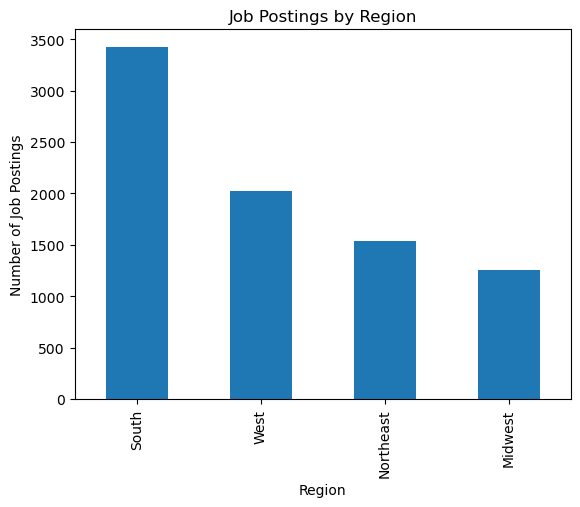

In [329]:
region_count = df['region'].value_counts()
# Plot the bar graph of job postings by region
region_count.plot(kind='bar')
plt.title('Job Postings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.show()
#This code defines a dictionary of regions and their respective states. It then creates a new column called "region" by mapping each state to its respective region. It then counts the number of job postings by region and creates a bar graph showing the number of job postings in each region.


In [48]:
def calculate_skill_match(df, skills):
    """
    Calculates the percentage match of the given skills with the 'skills' column in the given dataset.
    Returns a new dataframe with an additional column 'skill_match' that contains the percentage match
    for each job posting.
    """
    # Convert to set
    skills_set = set(skills)
    
    # Calculate the percentage match for each job posting
    skill_matches = []
    for job_skills in df['skills']:
        # Split the 'skills' string 
        if pd.notna(job_skills):
            job_skills_set = set(job_skills.split(', '))
            # Calculate the percentage of matching skills
            match_percent = len(job_skills_set & skills_set) / len(skills_set) * 100
            skill_matches.append(match_percent)
        else:
            skill_matches.append(np.nan)
    
    # Add the 'skill_match' column to the original dfframe
    df_with_match = df.copy()
    df_with_match['skill_match'] = skill_matches
    
    # Return the new dfframe with the 'skill_match' column
    return df_with_match

In [ ]:
def calculate_skill_match(my_skills, req_skills):
    my_skills = set(my_skills)
    req_skills = set(req_skills.split(', '))
    match = len(my_skills & req_skills) / len(req_skills)
    return match

In [49]:
#testing skill fn
my_skills = ['Python', 'SQL', 'Node.js' , 'React.js']

# Call the function
matched_data = calculate_skill_match(df, my_skills)

# top 20 job postings with the highest skill match percentage
top_matched = matched_data.nlargest(20, 'skill_match')
print(top_matched[['title', 'company', 'location', 'skill_match', 'salary']])

                                                  title  \
583   Sr Software Engineer - Behavioral Health Corpo...   
658                                 Full Stack Engineer   
690                         Full Stack Node.JS Engineer   
1398      Full Stack Software Engineer, S3VI, FORS, NEO   
1757                      Full Stack Software Developer   
2007                                  Angular Developer   
2196                 Senior Software Engineer (.Net/C#)   
2396                              Outsystems Consultant   
2649                           Cloud Software Developer   
2677                           Cloud Software Developer   
2883                               Full Stack Developer   
2884                               Full Stack Developer   
3622                          Full stack Java Developer   
3702                       Python Software Engineer - G   
5693            Software Developer (No C2C/Sponsorship)   
6567                    Full-stack Developer - C#, .NET 

In [50]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,posted_at,state,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp,median_salary
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,2021-04-13 22:31:54,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,2021-04-12 14:45:43,NC,South,South Atlantic,55.0,60.0,hourly,105600.0,115200.0,110400.0
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,2021-04-09 15:17:11,NC,South,South Atlantic,80000.0,120000.0,yearly,80000.0,120000.0,100000.0
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,2021-04-14 13:30:37,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,2020-03-06 22:05:41,NC,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
def filter_jobs_by_salary_range(df, salary_range):
    # Convert salary range to integer values
    min_salary = int(salary_range.split('-')[0])
    max_salary = int(salary_range.split('-')[1])
    
    # Filter jobs with annual compensation within the salary range
    filtered_df = df[(df['min_annual_comp'] >= min_salary) & (df['max_annual_comp'] <= max_salary)]
    
    return filtered_df

In [52]:
salary_range = '80000-100000'
top_matches = filter_jobs_by_salary_range(df, salary_range).head(10)
print(top_matches[['title', 'company', 'location', 'job_type', 'median_salary']])

                                            title  \
36                       Software Engineer (.NET)   
72                              SOFTWARE ENGINEER   
180                  CNC Programmer and Scheduler   
191                  CNC Programmer and Scheduler   
194                  CNC Programmer and Scheduler   
282  Software Developer - C#, ASP.Net, SQL Server   
292                      Programmer Analyst - SAS   
293                      Programmer Analyst - SAS   
402                     Full Stack .Net Developer   
457                       .NET WinForms Developer   

                         company         location   job_type  median_salary  
36               Vaco Technology    Charlotte, NC  Full Time        85000.0  
72      Xceleration Partners LLC    Charlotte, NC  Full Time        83000.0  
180                        Jobot  Statesville, NC  Full Time        87500.0  
191                        Jobot  Statesville, NC  Full Time        87500.0  
194                       

In [53]:
def top_skills(data, n):
    # Create a dictionary to count the occurrences of each skill
    skill_counts = {}

    # Loop over each job listing and count the number of occurrences of each skill
    for skills in data['skills']:
        if pd.isna(skills)==True:
            continue
        skill_list = skills.split(',')
        for skill in skill_list:
            if skill in skill_counts:
                skill_counts[skill] += 1
            else:
                skill_counts[skill] = 1

    # Create a DataFrame from the dictionary of skill counts
    skill_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['count'])

    # Sort the DataFrame by the count of each skill
    skill_df = skill_df.sort_values(by='count', ascending=False)

    # Return the top n most in-demand skills
    return skill_df.head(n)

In [54]:
top_skills = top_skills(df, n=15)

# Print the top skills
print(top_skills)

              count
 SQL           2064
 JavaScript    1702
 Java          1607
 Developer     1441
 Computer      1391
 Development   1321
 Engineer      1188
Software       1134
 API           1057
 HTML          1011
 IT            1008
 Python         997
 Software       972
 Engineering    935
 Web            917


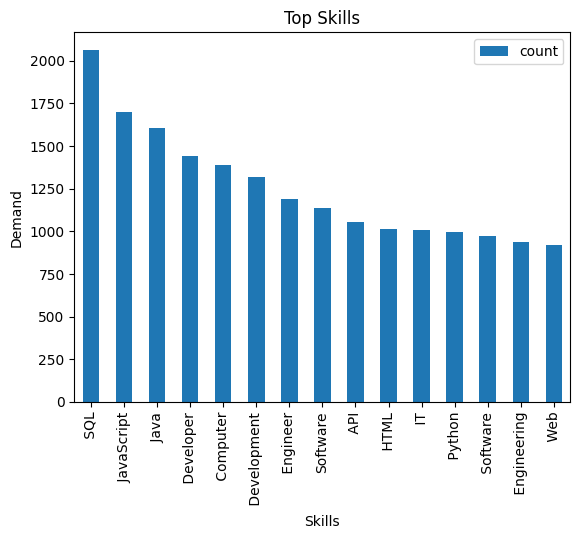

In [55]:
top_skills.plot(kind='bar')
plt.title('Top Skills')
plt.xlabel('Skills')
plt.ylabel('Demand')
plt.show()

In [56]:
def jobs_by_state(df):
    state_job_counts = df.groupby(['state', 'title']).size()
    state_job_counts = state_job_counts.reset_index()
    state_job_counts = state_job_counts.rename(columns={0: 'counts'})
    max_counts_index = state_job_counts.groupby('state')['counts'].idxmax()
    max_job_titles = state_job_counts.loc[max_counts_index]
    return max_job_titles

In [57]:
most_popular_jobs_by_state = jobs_by_state(df)
print(most_popular_jobs_by_state)

       state                                              title  counts
3999      AK                                      net Developer       1
7092      AL                                  Software Engineer       4
9066      AR                                Front End Developer       2
15098     AZ                                  Software Engineer       6
18754     CA                           Senior Software Engineer      54
22757     CO                           Senior Software Engineer      10
27110     CT                           Software Engineer (.NET)       9
30763     DC                           Senior Software Engineer       5
34554     DE            Senior Developer / Java / Microservices       3
38769     FL                           Senior Software Engineer      11
42772     GA                           Senior Software Engineer       9
44454     HI            Analytic Tool Support Software Engineer       1
49230     IA                        Full Stack Python Developer 

In [58]:
# https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94
# Define map center coordinates
map_center = [40.7831, -73.9712] # Example center point in New York City

# Create map object
map = folium.Map(location=map_center, zoom_start=10)

# Iterate over rows in dataset and add markers to the map
for index, row in df.iterrows():
    lat = row['latitude']
    long = row['longitude']
    job_title = row['title']
    company_name = row['company']
    salary = row['median_salary']

    # Create HTML string for marker popup
    popup_html = f"<b>{job_title}</b><br>{company_name}<br>{salary}"

    # Add marker to map
    folium.Marker(location=[lat, long], popup=popup_html).add_to(map)

# Display the map
# map

In [487]:
def plot_salary_distribution(df, job_title):
    
    df_salary_plot = df[df['mean_salary'].notnull() & df['title'].notnull()]
    matching_titles = df_salary_plot[df_salary_plot['title'].str.contains(job_title, case=False)]['title'].unique()
    
    if len(matching_titles) == 0:
        print("No matching job titles found.")
        return
    
    # Ask the user to select a job title
#     print("Matching job titles found:")
#     for i, title in enumerate(matching_titles):
#         print(f"{i}: {title}")
#     choice = int(input("Enter the number corresponding to the job title you want to plot the salary distribution for: "))
#     selected_title = matching_titles[choice]
    
    
    #Calculate median salary for each state
#     state_median_salary = df.groupby('state')['median_salary'].median().reset_index()
    state_median_salary = df.loc[df['title'].isin(matching_titles)].groupby('state')['mean_salary'].median().reset_index()
    # Plot the distribution of median salaries across different regions
    plt.figure(figsize=(16,9))
    sns.barplot(x='state', y='mean_salary', data=state_median_salary)
    plt.title('Median Salary by State')
    plt.xlabel('State')
    plt.ylabel('Median Salary ($)')
    plt.show()

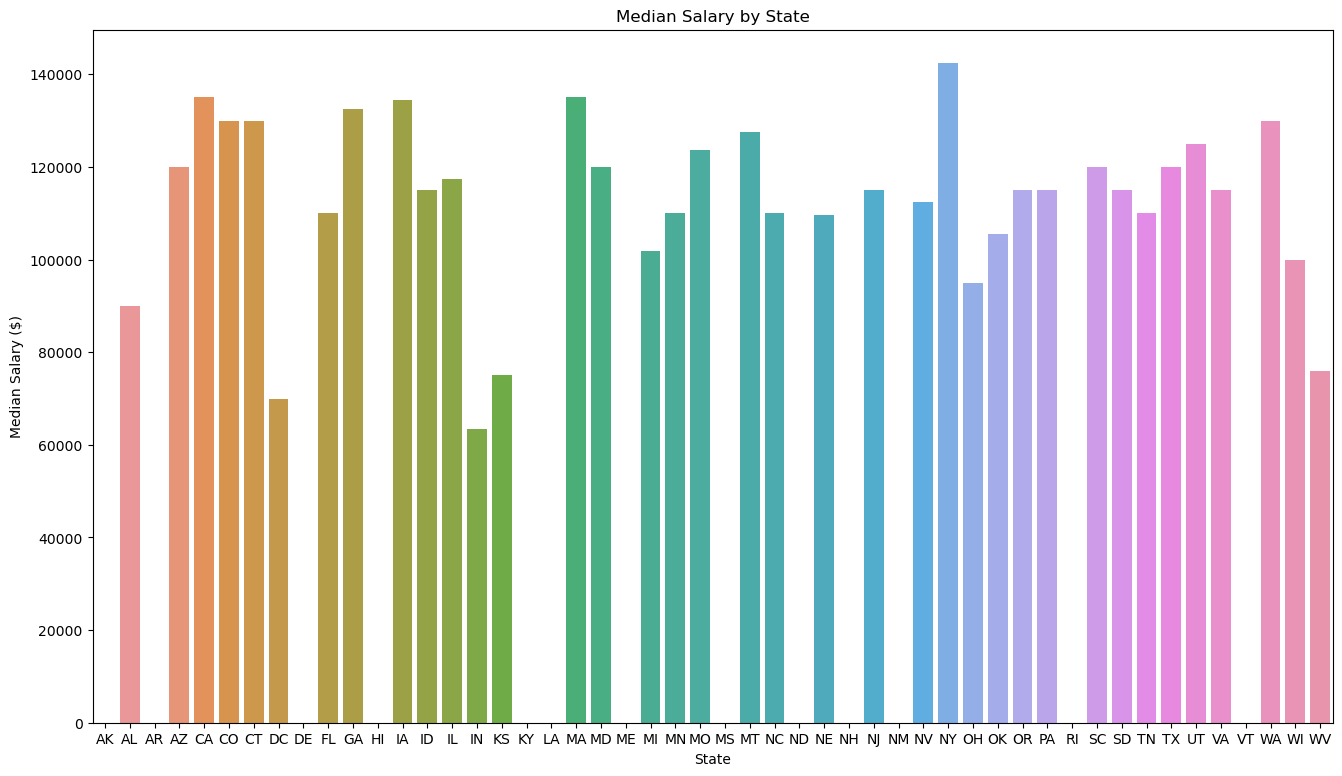

In [488]:
plot_salary_distribution(df, "software")

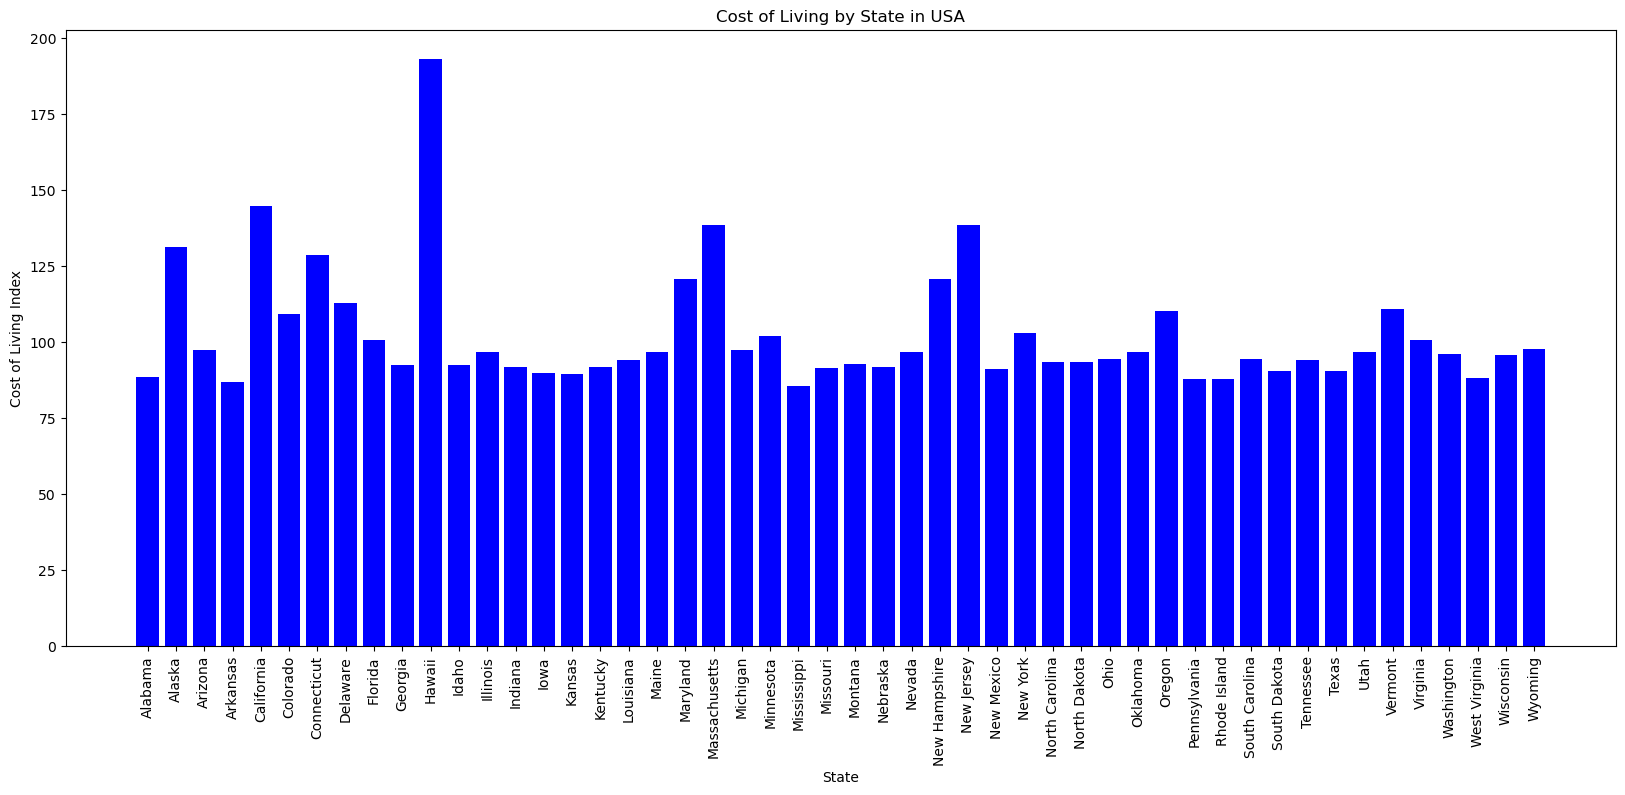

In [489]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

cost_of_living = [88.4, 131.3, 97.3, 86.9, 144.7, 109.3, 128.5, 112.8, 100.5, 92.5, 192.9, 92.4, 96.7, 91.8, 89.6, 89.4, 91.8, 93.9, 96.6, 120.7, 138.4, 97.4, 101.9, 85.6, 91.3, 92.7, 91.8, 96.6, 120.7, 138.4, 91.2, 102.9, 93.4, 93.4, 94.4, 96.6, 110.1, 87.9, 87.7, 94.2, 90.4, 94.1, 90.3, 96.6, 110.7, 100.5, 95.9, 88.1, 95.8, 97.5]
plt.figure(figsize=(20, 8))
plt.bar(states, cost_of_living, color='blue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Cost of Living Index')
plt.title('Cost of Living by State in USA')
plt.show()